<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Sebastian Fuentes Araneda</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


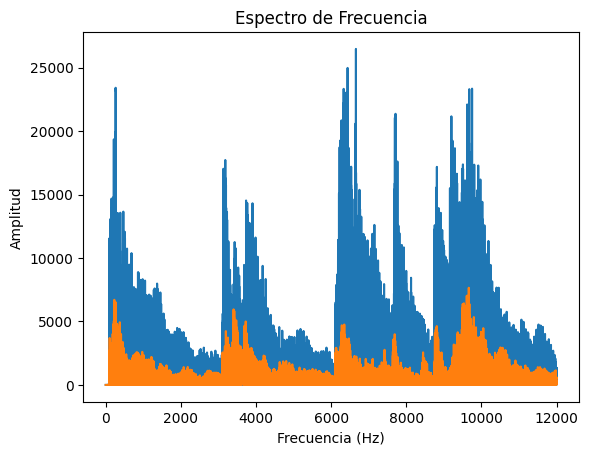

In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo .wav
archivo_wav = "audio1.wav"
frecuencia_muestreo, datos_audio = wavfile.read(archivo_wav)

# Paso 2: Calcular la FFT de los datos de audio
fft_resultado = np.fft.fft(datos_audio)

# Paso 3: Calcular las frecuencias correspondientes
num_muestras = len(datos_audio)
frecuencias = np.fft.fftfreq(num_muestras, 1 / frecuencia_muestreo)

# Paso 4: Capturar solo las frecuencias positivas
frecuencias_positivas = frecuencias[:num_muestras // 2]
fft_resultado_positivo = fft_resultado[:num_muestras // 2]

# Paso 5: Graficar el espectro de frecuencia en un solo color
plt.figure()
plt.plot(frecuencias_positivas, np.abs(fft_resultado_positivo))
plt.title('Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

# Paso 6: Reconstruir el audio a partir de la FFT inversa
audio_reconstruido = np.fft.ifft(fft_resultado)

# Paso 7: Guardar el audio reconstruido en un archivo .wav
wavfile.write("audio_reconstruido.wav", frecuencia_muestreo, np.real(audio_reconstruido).astype(np.int16))



## 2. Obtén el espectrograma de tu señal de audio

C:\Users\sebas\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


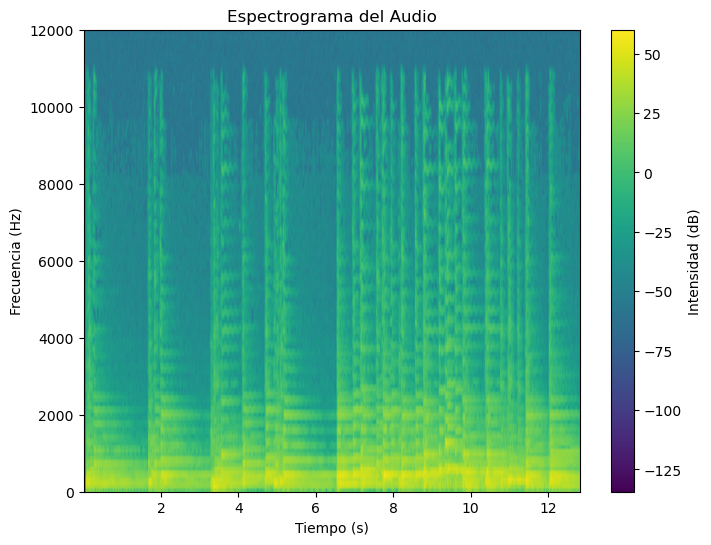

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Paso 1: Cargar el archivo .wav
archivo_wav = "audio1.wav"
frecuencia_muestreo, datos_audio = wavfile.read(archivo_wav)

# Paso 2: Convertir señal estéreo a mono
if datos_audio.ndim > 1:
    datos_audio_mono = np.mean(datos_audio, axis=1)
else:
    datos_audio_mono = datos_audio

# Paso 3: Calcular el espectrograma
plt.figure(figsize=(8, 6))
plt.specgram(datos_audio_mono, Fs=frecuencia_muestreo)
plt.title('Espectrograma del Audio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.colorbar(label='Intensidad (dB)')
plt.show()



## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.


In [ ]:
import wave
import numpy as np

def slice_wav(wav_file, slice_duration, overlap_samples):

  # Abrir el archivo WAV
  with wave.open(wav_file, 'rb') as wav:
    # Obtener parámetros del archivo
    sample_rate = wav.getframerate()
    num_channels = wav.getnchannels()
    total_samples = wav.getnframes()

    # Calcular la longitud de cada segmento en muestras
    slice_samples = int(slice_duration * sample_rate)

    # Calcular el número de segmentos
    num_slices = (total_samples + overlap_samples) // (slice_samples + 2 * overlap_samples)

    # Crear una lista para almacenar los segmentos
    slices = []

    # Iterar sobre los segmentos
    for i in range(num_slices):
      # Calcular el índice de inicio y fin del segmento actual
      start_index = i * (slice_samples + 2 * overlap_samples) - overlap_samples
      end_index = start_index + slice_samples + 2 * overlap_samples

      # Ajustar los índices si están fuera de rango
      start_index = max(0, start_index)
      end_index = min(total_samples, end_index)

      # Leer el segmento del archivo WAV
      wav.setpos(start_index)
      slice_data = wav.readframes(end_index - start_index)

      # Convertir el segmento a una matriz NumPy
      slice_array = np.frombuffer(slice_data, dtype=np.int16)

      # Agregar el segmento a la lista
      slices.append(slice_array)

  # Imprimir el número de segmentos restantes
  remaining_samples = total_samples - (num_slices * (slice_samples + 2 * overlap_samples) - overlap_samples)
  remaining_slices = 1 if remaining_samples > 0 else 0
  print("Segmentos restantes:", remaining_slices)

  # Devolver la lista de segmentos
  return slices

# Ejemplo de uso
wav_file = "audio1.wav"
slice_duration = 1  # Segmentos en segundos
overlap_samples = 100  # Superposición en muestras

slices = slice_wav(wav_file, slice_duration, overlap_samples)

# Imprimir la forma de cada segmento (número de canales, número de muestras)
for i, slice in enumerate(slices):
  print("Segmento", i + 1, "forma:", slice.shape)


Segmentos restantes: 1
Segmento 1 forma: (48200,)
Segmento 2 forma: (48400,)
Segmento 3 forma: (48400,)
Segmento 4 forma: (48400,)
Segmento 5 forma: (48400,)
Segmento 6 forma: (48400,)
Segmento 7 forma: (48400,)
Segmento 8 forma: (48400,)
Segmento 9 forma: (48400,)
Segmento 10 forma: (48400,)
Segmento 11 forma: (48400,)
Segmento 12 forma: (48400,)


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


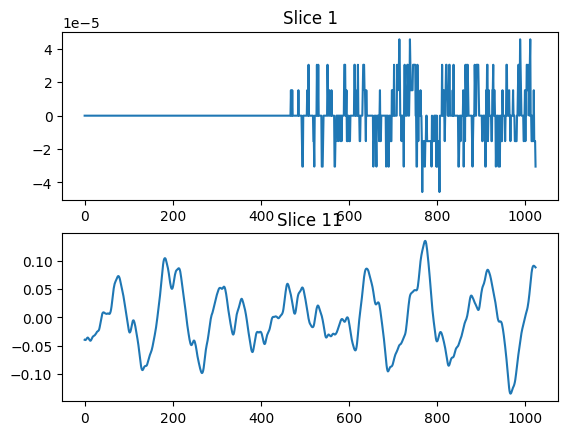

In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo WAV con torchaudio
archivo_wav = "audio1.wav"
waveform, sample_rate = torchaudio.load(archivo_wav)

# Conversión a mono
waveform_mono = waveform.mean(dim=0, keepdim=True)

# Paso 2: Convertir a tensor de PyTorch (si es necesario)
if not isinstance(waveform_mono, torch.Tensor):
    waveform_mono = torch.from_numpy(waveform_mono)

# Paso 3: Definir el tamaño del slice (en muestras)
tamaño_slice = 1024  # Ajusta este valor según tus necesidades

# Paso 4: Calcular el número de slices
num_slices = waveform_mono.shape[1] // tamaño_slice

# Paso 5: Crear una lista para almacenar los slices
slices = []

# Paso 6: Realizar el slicing usando slicing de tensores de PyTorch
for i in range(num_slices):
    inicio = i * tamaño_slice
    fin = inicio + tamaño_slice
    slice_actual = waveform_mono[:, inicio:fin]
    slices.append(slice_actual)

# Paso 7: Convertir la lista de slices a un tensor
slices_tensor = torch.stack(slices)

# Visualización de un par de slices
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(slices[0].numpy().T)
plt.title("Slice 1")

plt.subplot(2, 1, 2)
plt.plot(slices[10].numpy().T)
plt.title("Slice 11")
plt.show()

# Reproducción del audio (opcional, requiere una biblioteca de audio)
# Puedes usar torchaudio.play o una biblioteca como sounddevice

# Ejemplo con torchaudio.play (asegúrate de tener la salida de audio configurada)
# torchaudio.play(waveform_mono, sample_rate)

## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

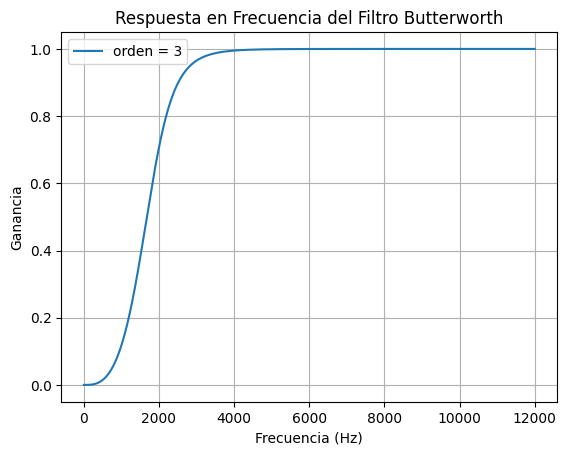

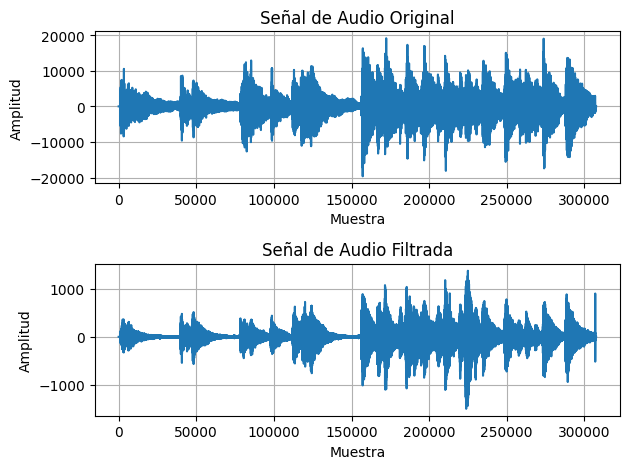

In [49]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

# 1. Cargar archivo de audio WAV
sampling_rate, audio_data = wavfile.read('audio1.wav')

# Convertir a mono si es necesario
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]

# 2. Definir parámetros del filtro Butterworth
cutoff_freq = 2000  # Hz
order = 3
filter_type = 'high'  # 'low', 'high', 'bandpass', 'bandstop'

# 3. Diseñar el filtro Butterworth
nyquist_freq = 0.5 * sampling_rate
normalized_cutoff_freq = cutoff_freq / nyquist_freq
b, a = butter(order, normalized_cutoff_freq, btype=filter_type)

# 4. Aplicar el filtro a la señal de audio
filtered_audio = lfilter(b, a, audio_data)

# 5. Visualizar la respuesta en frecuencia del filtro
w, h = freqz(b, a, worN=8000)
plt.figure(1)
plt.plot(0.5*sampling_rate*w/np.pi, np.abs(h), label="orden = %d" % order)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid(True)
plt.title("Respuesta en Frecuencia del Filtro Butterworth")
plt.legend(loc='best')

# 6. Graficar la señal de audio original y filtrada
plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(audio_data)
plt.title('Señal de Audio Original')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(filtered_audio)
plt.title('Señal de Audio Filtrada')
plt.xlabel('Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# 7. Guardar el audio filtrado (opcional)
wavfile.write('filtered_audio.wav', sampling_rate, filtered_audio)

El uso de un filtro pasa altas Butterworth de orden 3 con una frecuencia de corte de 2000 Hz ha demostrado ser eficaz para eliminar eficientemente los ruidos de baja frecuencia en la señal de audio. Sin embargo, es esencial reconocer que esta acción también conlleva la pérdida de información crucial en las frecuencias más bajas, como las notas graves. Este efecto puede resultar en una sensación de sonido "seco" o carente de plenitud, lo que afecta la calidad general y la nitidez de la señal resultante. Por lo tanto, al implementar este tipo de filtro, se debe tener en cuenta el equilibrio entre la eliminación del ruido no deseado y la preservación de las características fundamentales del audio para mantener su calidad y naturaleza original.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
